In [1]:
%matplotlib inline

In [2]:
from kaggle_quora_question_pairs_common import *

dataset.hdf
sample_submission.csv
sample_submission.csv.zip
test.csv
test.csv.zip
train.csv
train.csv.zip



/home/avsolatorio/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using gpu device 0: GeForce GTX 860M (CNMeM is disabled, cuDNN not available)


In [3]:
train_df, test_df = load_train_test()

In [4]:
%%time
unique_questions = get_unique_questions(train_df, test_df, include_test=True)

CPU times: user 1.28 s, sys: 24 ms, total: 1.3 s
Wall time: 1.3 s


In [5]:
%%time
from collections import Counter

end_chars = {'.', '?'}

cc = Counter()
for q in unique_questions:
    q = q.strip()
    if q[-1] in end_chars:
        q = q[:-1]

    cc.update(set(q.split()))

tokens_df = pd.DataFrame(cc.most_common(), columns=['terms', 'freq']).set_index('terms')
del(cc)
# tokens_df.plot()
# plt.loglog()

# tokens_df.ix[tokens_df.index.str.contains('-')]

# tokens_df[tokens_df.freq == 1].reset_index().terms.str[-1].value_counts()
# tokens_df[tokens_df.freq == 1].reset_index().terms.str[0].value_counts()
# tokens_df[tokens_df.freq == 1].reset_index().terms.str.contains("'s").value_counts()

CPU times: user 36.1 s, sys: 164 ms, total: 36.3 s
Wall time: 36.1 s


In [106]:
1.0 * tokens_df.head(100) / len(unique_questions)

,freq
terms,
the,0.349022
What,0.344527
is,0.239961
How,0.238251
in,0.221672
a,0.219007
to,0.213294
I,0.206169
of,0.171272


In [23]:
# lower case

# Remove trailing ?
tokens_df.ix[tokens_df.index.str.endswith('?')].index.str.rstrip('?')

# Remove trailing ,
tokens_df.ix[tokens_df.index.str.endswith(',')].index.str.rstrip(',')

# Replace . with ''
tokens_df.ix[tokens_df.index.str.endswith('.')].index.str.replace('.', '')

Index([u'India', u'', u'from', u'it', u'life', u'work', u'mean', u'balance',
       u'do', u'possible',
       ...
       u'tamable', u'genomics', u'cost-effective', u'coverage.', u'blogger',
       u'matlab's)', u'd3200', u'headquarters', u'IITD', u'lesioning'],
      dtype='object', name=u'terms', length=16812)

In [ ]:
special_quotes = (u'\u201c', u'\u201d')  # u'“Citicholine”'

In [27]:
u'“Citicholine”'

u'\u201cCiticholine\u201d'

In [59]:
tokens_df.ix['usa']

freq    1760
Name: usa, dtype: int64

In [67]:
from enchant import Dict
en_dict = Dict('en-us')

In [92]:
%time en_dict.check('COO')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 247 µs


True

In [61]:
stops = load_stopwords()

In [365]:
print_question_pairs(train_df[train_df.is_duplicate == 1].head(100), sample=True)

Will Modi win in 2019?
Can Narendra Modi become Prime Minister of India in 2019?
1

Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?
1

Why my question was marked as needing imrovement?
How can I ask a question without getting marked as ‘need to improve’?
1

What is the best combination of courses I can take up along with CA to enhance my career?
What courses must be taken along with CA course?
1

Why are we worried about others' opinions?
Why do we care for others' opinion and about what others think about us?
1

What does the Quora website look like to members of Quora moderation?
How does Quora look to a moderator?
1

What's the difference between love and pity?
What is the difference between love and pity?
1

How do I use Twitter as a business source?
How can I use Twitter for business?
1

What was your first sexual experience like?
What was your first se

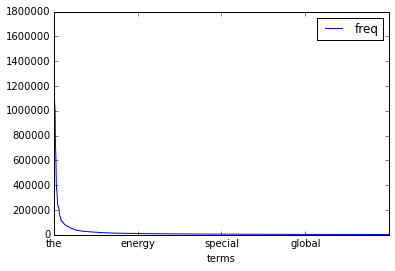

In [364]:
tokens_df[:2000].plot()

In [100]:
tokens_df.ix[tokens_df.index.str.contains('\.*[a-zA-Z]\.[a-zA-Z]\.*')]  #.index.str.replace('.', '')

,freq
terms,
U.S.,9246
B.Tech,3859
M.Tech,1954
b.tech,1273
U.S,1231
(e.g.,890
u.s,824
Node.js,765
B.tech,710


In [137]:
country_capital_df = pd.read_csv('country-capital.csv', encoding='utf-8')
world_cities_df = pd.read_csv('world-cities.csv', encoding='utf-8')

In [139]:
world_cities_df

,name,country,subcountry,geonameid
0,les Escaldes,Andorra,Escaldes-Engordany,3040051
1,Andorra la Vella,Andorra,Andorra la Vella,3041563
2,Umm al Qaywayn,United Arab Emirates,Umm al Qaywayn,290594
3,Ras al-Khaimah,United Arab Emirates,Raʼs al Khaymah,291074
4,Khawr Fakkān,United Arab Emirates,Ash Shāriqah,291696
5,Dubai,United Arab Emirates,Dubai,292223
6,Dibba Al-Fujairah,United Arab Emirates,Al Fujayrah,292231
7,Dibba Al-Hisn,United Arab Emirates,Al Fujayrah,292239
8,Sharjah,United Arab Emirates,Ash Shāriqah,292672
9,Ar Ruways,United Arab Emirates,Abu Dhabi,292688


In [296]:
tokens_df.ix['Muscat']

freq    35
Name: Muscat, dtype: int64

In [236]:
'los' in capital_tokens.values

True

In [244]:
title_tokens

,freq
terms,
A,11049.0
A.,313.0
Aachen,29.0
Aalborg,6.0
Ababa,1.0
Abbey,39.0
Aberdeen,1.0
Abkhazia,11.0
Abu,479.0


In [307]:
capital_tokens = pd.Series(sorted({j for i in capital_subcountry_cities.str.split().tolist() for j in i}))


title_tokens = tokens_df.ix[capital_tokens.ix[capital_tokens.str.istitle()]].dropna()
lower_tokens = tokens_df.ix[capital_tokens.ix[capital_tokens.str.istitle()].str.lower()].dropna()

normalization_candidates = title_tokens.index.str.lower().intersection(lower_tokens.index)

# w = title_tokens.ix[normalization_candidates.str.title()].copy().dropna()
# w.index = normalization_candidates
# pd.concat([w, lower_tokens.ix[normalization_candidates].dropna()], axis=1)
# # lower_tokens.ix[normalization_candidates].shape, w.shape

lower_to_title = {}

for i in normalization_candidates:
    lower_rarity = int(title_tokens.ix[i.title()].values[0]) / float(lower_tokens.ix[i].values[0])
    lower_to_title[i] = (lower_rarity, int(lower_tokens.ix[i].values[0]))

lower_to_title = pd.DataFrame(lower_to_title, index=['rarity', 'lower_count']).T
lower_to_title.sort_values('lower_count',ascending=True, inplace=True)

In [336]:
lower_to_title[(lower_to_title.lower_count <= 10) & (lower_to_title.rarity > 1)]

,rarity,lower_count
bima,7.000000,1.0
trent,17.000000,1.0
tres,7.000000,1.0
brighton,11.000000,1.0
bria,6.000000,1.0
hisar,2.000000,1.0
santander,6.000000,1.0
santana,10.000000,1.0
trujillo,6.000000,1.0
potsdam,6.000000,1.0


In [338]:
test_df[test_df.question1.str.contains('fatwa')]

,test_id,question1,question2
226784,226784,What is smaller the meaning of the word 'fatwa'?,How word of?
324976,324976,What is the meaning of the countries 'fatwa'?,"Why does is the meaning of the word ""conferral""?"
447284,447284,"Is a day"" heter (halachic permission) analogou...",Is full occupancy alcohol before selling a pro...
820997,820997,Why the word 'fatwa'?,What 2016 the meaning of the word of?
985799,985799,How powerful is 'fatwa'?,Which continent does Russia dessert to?
1006742,1006742,What is the meaning of word 'fatwa'?,"What is the meaning carpenter the word ""confer..."
1357725,1357725,What the meaning of the word 'fatwa'?,What is the meaning below of word ‘consent’?
1473416,1473416,Is a public heter (halachic permission) analog...,Is full occupancy necessary before selling fre...
1830936,1830936,What do fatwa eat after a run?,Is it normal for my throat to hurt after calli...
1896927,1896927,Is a public heter (halachic permission) analog...,What are a property?


In [289]:
lower_to_title[lower_to_title > 2][::-1]

northeast        2.041096
x.               2.047619
muscat           2.058824
bishop           2.066667
burla            2.066667
amritsar         2.069767
aachen           2.071429
tor              2.093750
imperial         2.097744
panvel           2.100000
raleigh          2.111111
ridge            2.117647
magna            2.122449
euclid           2.125000
raipur           2.141414
rohtak           2.150000
urbana           2.166667
stuttgart        2.166667
maha             2.166667
bristol          2.181818
bang             2.186016
khanna           2.214286
dodge            2.233333
northern         2.233491
ajax             2.240000
papa             2.250000
charleston       2.272727
echo             2.283333
scotia           2.285714
baja             2.285714
                  ...    
janeiro         29.000000
dana            30.000000
belfast         31.000000
casablanca      31.000000
tulsa           31.000000
valdosta        31.000000
anderson        31.500000
gilbert     

In [192]:
# For capitals and top cities, make sure that we don't replace common words, example, worms, young, etc.
# Algorithm:
# Check if count of upper cased > lower cased. This may suggest that indeed, the term is a proper noun.
# If the lower cased term is more popular, then leave unchanged.
# Automatically replace rare tokens???
candidate_tokens = tokens_df.ix[capital_subcountry_cities[(capital_subcountry_cities.str.isalnum())].str.lower()].dropna()
tokens_df.ix[candidate_tokens.index.str.title()]

,freq
terms,
Aachen,29.0
Aalborg,6.0
Aba,NaN
Abilene,NaN
Accra,12.0
Acre,NaN
Acton,1.0
Ada,21.0
Addison,6.0


In [200]:
countries = pd.Series(sorted(set(world_cities_df.country).union(country_capital_df.country)))
capital_subcountry_cities = pd.Series(sorted(set(world_cities_df['name']).union(world_cities_df['subcountry']).union(country_capital_df.capital))).dropna()
# capital_subcountry_cities = capital_subcountry_cities[capital_subcountry_cities.str.isalnum()]


# tokens_df.ix[capital_subcountry_cities[capital_subcountry_cities.str.contains('(c|C)ity')].str.replace('(c|C)ity', '').str.replace(' of ', '').str.strip().str.lower()].sort_values('freq', ascending=False).dropna()
sh = tokens_df.ix[capital_subcountry_cities[(capital_subcountry_cities.str.isalnum())].str.lower()].dropna().sort_values('freq', ascending=True)
sh[sh < 5].dropna()

,freq
terms,
izmir,1.0
guadalajara,1.0
sheffield,1.0
gombe,1.0
godhra,1.0
glassboro,1.0
gladstone,1.0
gilbert,1.0
sheridan,1.0


In [ ]:
# Features (Should counter the similarity derived from embeddings e.g., Pune and Bangalore are similar but should be different in context.)
# has_country
# same_country
# has_capital
# same_capital

In [126]:
train_df[train_df.question1.str.contains("'s ")].head()
train_df.question1.str.replace("'s ", " ")


def clean_text(text):
    
    text = text.str.replace("what's", "what is ")
    text = text.str.replace("'s", " ")
    text = text.str.replace("'ve", " have ")
    text = text.str.replace("can't", "cannot ")
    text = text.str.replace("n't", " not ")
    text = text.str.replace("i'm", "I am")
    text = text.str.replace("\'re", " are ")
    text = text.str.replace("\'d", " would ")
    text = text.str.replace("\'ll", " will ")

    text = text.str.replace('?', '')
    text = text.str.replace('.', '')
    
    # Use country and capital database to normalize states.
    # https://raw.githubusercontent.com/icyrockcom/country-capitals/master/data/country-list.csv
    # https://raw.githubusercontent.com/datasets/world-cities/master/data/world-cities.csv
    for country in countries:
        text = text.str.replace(country.lower(), country)

    for csc in capital_subcountry_cities.iterrows():
        text = text.str.replace(country.lower(), country)
        text = text.str.replace(capital.lower(), capital)

    return text

In [128]:
%time clean_text(train_df.head(100).question1)[0]

CPU times: user 160 ms, sys: 0 ns, total: 160 ms
Wall time: 155 ms


'What is the step by step guide to invest in share market in India'

In [107]:
tokens_df.index[tokens_df.index.str.endswith("'s")]

Index([u'What's', u'it's', u'what's', u'someone's', u'"Japan's', u'India's',
       u'one's', u'master's', u'Trump's', u'he's',
       ...
       u'Pepsico's', u'board's', u'hamster's', u'coursera's', u'm.tech's',
       u'Miscavige's', u'UNIQLO's', u'Uranus's', u'Janszoon's', u'cars/SUV's'],
      dtype='object', name=u'terms', length=7931)

In [116]:
train_df[train_df.question1.str.contains('rohingya')]

,id,qid1,qid2,question1,question2,is_duplicate
201277,201277,303242,303243,What can ASEAN do about rohingya?,What should the ASEAN do to the Rohingya people?,1


In [ ]:
token_maps = {
    "What's": 'What is',
    "don't": 'do not',
    "I'm": 'I am',
    "can't": 'cannot',
    "doesn't": 'does not',
    "you've": 'you have',
    "didn't": 'did not',
    "it's": 'it is',
    "what's": 'what is',
    "I've": 'I have',
    "isn't": 'is not',
    "better:": 'better',
    "won't": 'will not',

    "U.S.": "United States",
    "US": "United States",
    "US.": "United States",
    "USA.": "United States",
    "USA": "United States",
    
    "U.K.": "United Kingdom",
    "UK.": "United Kingdom",
    "UK": "United Kingdom",
    
    "Rs.": 'Rupees',
    "Dr.": 'doctor',
    "Mr.": 'mister',
    "Jr.": 'junior',
    "govt.": 'government',
    "Govt.": 'government',
    "Ph.D.": "PhD",
    "engg.": "engineering",
    
    "(e.g.": "eg",
    "e.g.": "eg",
    "(i.e.": "ie",
    "i.e.": "ie",
    
    "kg.": "kilogram",    
    "kg": "kilogram",
    "Kg": "kilogram",
    "Kg.": "kilogram",
    "kgs.": "kilogram",
    "kgs": "kilogram",
    "Kgs": "kilogram",
    "Kgs.": "kilogram",

    "cm.": "centimeter",
    "cm": "centimeter",
    
    "Inc.": 'Incorporated'
    "Inc": 'Incorporated'
    "I.T.": 'information technology',
    "IT.": 'information technology',
    "IT": 'information technology',
    
    "M.Sc.": "Master of Science",
    "M.A.": "Master of Arts",
}

whitelist = {
    # All pure numbers
    '/'
}

In [17]:
tokens_df.ix['America']

freq    9148
Name: America, dtype: int64

In [19]:
tokens_df.ix[~tokens_df.index.str.isalpha()].reset_index().iloc[29:50]

,terms,freq
29,20,6717
30,I've,6563
31,isn't,6351
32,15,6230
33,/,6213
34,me.,6204
35,someone's,6166
36,C++,5936
37,"better,",5534
38,India?,5382


In [9]:
tokens_df

,freq
terms,
the,1671477
What,1649949
is,1149183
How,1140992
in,1061594
a,1048833
to,1021473
I,987351
of,820227


In [23]:
r = (100.0 * tokens_df / len(unique_questions)).tail(105000)

In [22]:
word_tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2))

In [40]:
%%time
word_tfidf.fit(unique_questions[:1000000])

CPU times: user 36.8 s, sys: 440 ms, total: 37.3 s
Wall time: 37 s


TfidfVectorizer(analyzer='word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [46]:
word_tfidf.transform(unique_questions[:10])

<10x1928742 sparse matrix of type '<type 'numpy.float64'>'
	with 175 stored elements in Compressed Sparse Row format>

In [47]:
log_max_mem_usage()

len(word_tfidf.vocabulary_)

Current all-time max memory: 2282 MB


1928742

In [28]:
r.index.values[:10]

array(['serials.', '600hz', 'scrub-baseball', 'WAAP', '500-600cc', 't200a',
       'y\xe2\x80\x99=-x(1+y)', 'o-ve', 'zaarly', 'C-Level'], dtype=object)

In [69]:
def cache_pos_tag():
    cache = {}
    
    def get_pos(s):
        m = None
        if s in cache:
            m = cache[s]
        else:
            m = zip(*pos_tag(s.split()))[1]
            cache[s] = m
        
        return m

    return get_pos


get_cached_pos = cache_pos_tag()

In [140]:
def pos_match_score(row):
    ix = 1522
    q1 = row.question1.decode('utf-8')
    q2 = row.question2.decode('utf-8')
    
    

    pos_1 = get_cached_pos(q1)
    pos_2 = get_cached_pos(q2)

    w = pd.DataFrame(index=set(pos_1).union(pos_2))

    w['pos_1'] = pd.Series(Counter(pos_1))
    w['pos_2'] = pd.Series(Counter(pos_2))

    w = w.fillna(0)
    w = w / w.sum()
    
    pos_match = normalized_mutual_info_score(w.pos_1, w.pos_2)

#     pos_match = 1.0 * len(set(pos_1).intersection(pos_2)) / len(set(pos_1).union(pos_2))
    return pos_match

#     print q1
#     print q2
#     print train_df.ix[ix].is_duplicate

In [141]:
%%time
n = 10000
df = pd.DataFrame()
df['is_duplicate'] = train_df.head(n).is_duplicate
df['pos_match'] = train_df.head(n).apply(pos_match_score, axis=1)

CPU times: user 31.1 s, sys: 64 ms, total: 31.1 s
Wall time: 31.1 s


In [142]:
## from sklearn.metrics import log_loss, mutual_info_score, normalized_mutual_info_score
log_loss(df.is_duplicate, df.pos_match)

2.5903099539822505

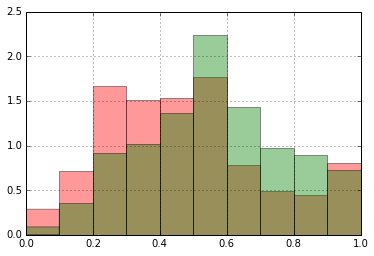

In [110]:
df[df.is_duplicate == 0].pos_match.hist(normed=True, alpha=0.4, color='r')
df[df.is_duplicate == 1].pos_match.hist(normed=True, alpha=0.4, color='g')

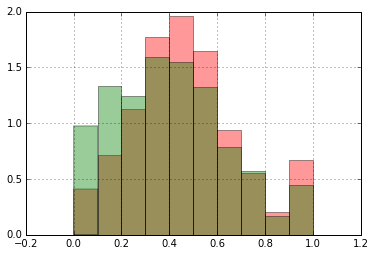

In [143]:
df[df.is_duplicate == 0].pos_match.hist(normed=True, alpha=0.4, color='r')
df[df.is_duplicate == 1].pos_match.hist(normed=True, alpha=0.4, color='g')

# EDA

In [ ]:
# re.compile('\b[a-zA-Z]+\p{P}?(?=\s|$)')
wr = re.compile('[\w\S]+')

In [39]:
%%time
def get_special(w):
    if not w.isalnum():
        return w

for i in unique_questions[:100]:
    print filter(get_special, wr.findall(i.rstrip('?')))

'When do you use "&" instead of "and"?'

In [ ]:
print_question_pairs(train_df[train_df.question1.str.contains('\(.*\)')])

In [ ]:
'''
# Cleaning
1. Remove ?
2. Remove 's
3. Remove '<>'
4. Remove "<>"
5. Normalize digits, i.e., 15,000 -> 15000
'''

# remove chars in end of word of terms occuring only once
end_exclude_chars_pat = """[\,\.\?\"\'\)]+$"""
end_exclude_chars_single_instance = re.compile(end_exclude_chars_pat)

In [ ]:
dict(
    'dm_phone': fuzzy.DMetaphone(20),
    'sx_phone': fuzzy.Soundex(20),
    'ni_phone': fuzzy.nysiis
def phonetic_transform(word):

# ('hello')